<div style="text-align: center; background-color: #559cff; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
  Lab 02 - Introduction To Data Science @ FIT-HCMUS, VNU-HCM 📌
</div>

<div style="text-align: center; background-color: #b1d1ff; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
  Stage 3.0 - Exploratory data analysis
</div>

## Import

In [19]:
import os
import sys

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from src.data_module import read_processed_df
import json
%matplotlib inline

## Exploring data

### Read 2 cleaned data from file

We can now use the cleaned dataset for analysis. Thus, we first read the CSV files we created in the previous pre-processing task.

In [20]:
# YOUR CODE HERE
cleaned_videos_df = read_processed_df.read_video_df()
cleaned_comments_df= read_processed_df.read_comment_df()

### Exploring general data

#### Videos section

In [21]:
# TEST VIDEOS
cleaned_videos_df.head()

,video_id,title,published,view_count,like_count,comment_count,duration,definition,tags,default_audio_language,madeforkid,channelTitle
0,hh6gE0LxfO8,"#5 Machine Learning Specialization [Course 1, ...",2022-12-01 13:21:30+00:00,30742,319.0,6.0,0 days 00:07:17,hd,NaN,en,False,DeepLearningAI
1,_i3aqgKVNQI,C5W3L01 Basic Models,2018-02-05 19:50:14+00:00,110835,436.0,12.0,0 days 00:06:19,hd,NaN,en,False,DeepLearningAI
2,uvTL1N02f04,"#23 Machine Learning Specialization [Course 1,...",2022-12-01 13:22:38+00:00,11639,107.0,4.0,0 days 00:06:53,hd,NaN,en,False,DeepLearningAI
3,H4YK_7MAckk,ChatGPT Prompt Engineering for Developers: A s...,2023-04-27 14:49:09+00:00,143057,2847.0,121.0,0 days 00:01:58,hd,"[ChatGPT, prompt engineering, openai, deeplear...",en,False,DeepLearningAI
4,YVtP5UGdgXg,"#25 Machine Learning Specialization [Course 1,...",2022-12-01 13:22:45+00:00,11542,106.0,1.0,0 days 00:06:35,hd,NaN,en,False,DeepLearningAI


In [22]:
# Shape of the dataframe
cleaned_videos_df.shape

(5472, 12)

In [23]:
# Some information about the dataframe
cleaned_videos_df.dtypes

video_id                               object
title                                  object
published                 datetime64[ns, UTC]
view_count                              int64
like_count                            float64
comment_count                         float64
duration                      timedelta64[ns]
definition                             object
tags                                   object
default_audio_language                 object
madeforkid                               bool
channelTitle                           object
dtype: object

- Next, let's explore this data by individual data groups
    - Numerical:`view_count`, `like_count`, `comment_count`

#### Comment section

In [26]:
cleaned_comments_df.head()

,author,Type,video_id,total_reply,like_count,published_at,textdisplay,updatedat
0,@AiexpertRajivVerma,1.0,H_8ZVRRtiIA,0.0,0.0,2023-12-11 01:11:19+00:00,Sir thank you love love 💕❤️❤❤️❤❤❤❤❤❤ you for f...,2023-12-11 01:11:19+00:00
1,@hamasali8764,1.0,bZwkaVnhEo4,0.0,0.0,2023-07-27 16:54:52+00:00,Best One🎉,2023-07-27 16:54:52+00:00
2,@R0H00,1.0,hkOosfWxBK4,0.0,1.0,2023-11-18 02:51:01+00:00,"Hi, I&#39;m a clinician who is working in the ...",2023-11-18 02:51:01+00:00
3,@nitinsnoisepollution6293,1.0,hkOosfWxBK4,0.0,0.0,2023-11-17 20:39:13+00:00,Superb 🎉❤,2023-11-17 20:39:13+00:00
4,@REDBONDYT,1.0,Fxq6vjJwX3o,0.0,1.0,2023-07-30 12:36:13+00:00,Very informative 😃😺,2023-07-30 12:36:13+00:00


In [27]:
cleaned_comments_df[cleaned_comments_df['like_count'].max()==cleaned_comments_df['like_count']]

,author,Type,video_id,total_reply,like_count,published_at,textdisplay,updatedat
9881,@jomakaze,1.0,rR4n-0KYeKQ,392.0,65952.0,2020-02-10 21:44:12+00:00,LGTM = Looks good to me,2020-02-10 21:44:12+00:00


In [28]:
cleaned_comments_df.shape

(110409, 8)

In [29]:
cleaned_comments_df.dtypes

author                       object
Type                        float64
video_id                     object
total_reply                 float64
like_count                  float64
published_at    datetime64[ns, UTC]
textdisplay                  object
updatedat       datetime64[ns, UTC]
dtype: object

**Question 01**: What are the hot trends over the years?
- Meanings:
    - Helps us know which keywords are most used by channels.
    - Helps us know how the trends of those hot keywords fluctuate over time. This can also help channels look to focus on topics that can attract more viewers.
- Small problems:
    - Since the earliest video was published, what keywords have been used the most ?
    - How has the usage level of each **hot** keyword changed over the years ?

First we need to read the file containing keywords related to 'data science' and 'AI' (except some popular keywords such as :data ,data science,AI,data analyst,...) provided in `data/external/keywords.txt`

In [30]:
file_keywords=open('../data/external/keywords.txt','r')
keywords=file_keywords.read().split('\n')

In [31]:
def get_keywords_freq(text:str)->dict:
    """
    Function to get the frequency of keywords in a text
    """
    text = text.lower()  
    keywords_freq={}
    for keyword in keywords:
        #Lowercase and remove whitespace
        keyword_new = keyword.lower()
        #lowercase to match
        if keyword_new in text:
            if keyword not in keywords_freq:
                keywords_freq[keyword]=1
            else:
                keywords_freq[keyword]+=1
    return keywords_freq


#Get the first and last year of the dataframe
first_year=cleaned_videos_df['published'].min().year
last_year=cleaned_videos_df['published'].max().year
#Create a dataframe to store the frequency of keywords in each year ,fill with 0
keywords_freq_df = pd.DataFrame(0,index=keywords,columns=range(first_year,last_year+1))


#Loop through each title and update the keywords_freq_df
for title,year in zip(cleaned_videos_df['title'],cleaned_videos_df['published'].dt.year):

    #Get the frequency of keywords in the title
    keywords_freq = get_keywords_freq(title)
    
    #Update the keywords_freq_df
    for keyword in keywords_freq:
        keywords_freq_df.loc[keyword,year]+=keywords_freq[keyword]

#Create list of keywords on top 10 all years
top_10_keywords=keywords_freq_df.sum(axis=1).sort_values(ascending=False).index.tolist()[:10]
top_5_keywords=keywords_freq_df.sum(axis=1).sort_values(ascending=False).index.tolist()[:5]

In [32]:
import plotly.express as px
#Illustrate the frequency of keywords in each year of top 10 keywords and bar chart of top 10 keywords
fig = px.bar(x=keywords_freq_df.sum(axis=1).sort_values(ascending=False).values[:10],
             y=top_10_keywords,orientation='h',title='Top 10 keywords',
             labels={'x':'Frequency','y':'Keywords'})

fig.show()
#Transpose the dataframe to plot
keywords_freq_df_transpose = keywords_freq_df.T
fig=px.line(keywords_freq_df_transpose,x=keywords_freq_df_transpose.index,y=top_5_keywords,markers=True
            ,title='Frequency of top 5 keywords in each year',labels={'index':'Year','value':'Frequency'})
fig.show()

##### Answers questions 1:
- Regarding frequently used keyword questions:
    - In general, the most used keywords are related to machine learning or deep learning (tensorflow, neural networks) and python libraries supporting the field of AI and data.
    - Details `GPT` is the most used keyword with nearly (200 appearances in video titles) even though it only appeared recently. From there we can see that `GPT` has influenced the technology world in general very much. big.
- Regarding "How has the usage level of each **hot** keyword changed over the years ?"
    - Among the 5 hot keywords, most of them are constantly fluctuating. However, in 2020, each keyword will increase in frequency appearing in headlines.We can simply explain that due to the impact of the covid-19 epidemic, many people stay at home so they have more time to watch Youtube.
    - GPT has a rapid growth rate in 2023 (from about 9 times in 2022 to 180 times in 2023 ).With current strong investment, in the future GPT can still keep the top keywords appearing on Youtube.


**Question 02**:How does the channel attract viewers? (Analyzes based on:)
- How often do videos come out?
- Is the topic often included in the top trend list?
- Are the videos in the same group as some other videos (number of playlists)?
- How the channel owner interacts with viewers (how often do you reply to comments?)

In [33]:
cleaned_comments_df['Type'].value_counts()

1.0    85243
2.0    25166
Name: Type, dtype: int64

In [34]:
def create_dataframe_title_contains_top_keywords(df_videos: pd.DataFrame, top_keywords: list) ->pd.DataFrame:

    #Lowercase the keywords
    top_keywords_lower = [keyword.lower() for keyword in top_keywords]

    #Count the number of keywords in the title
    def count_keywords_in_title(title):
        return sum(keyword in title.lower() for keyword in top_keywords_lower)

    df_videos['keywords_count'] = df_videos['title'].apply(count_keywords_in_title)

    #Caclulate the total number of keywords in each channel
    filtered_df = df_videos.groupby('channelTitle')['keywords_count'].sum()

    filtered_df = pd.DataFrame(filtered_df).reset_index()
    filtered_df.columns = ['channelTitle', 'keywords_count']
    return filtered_df

#Calculate the frequency up video (number of videos per day)
def Create_DataFrame_Up_Frequency(cleaned_videos_df:pd.DataFrame)->pd.DataFrame:
    #
    list_channel=cleaned_videos_df['channelTitle'].unique()
    dict_frequency={}
    for channel in list_channel:
        earliest_up=cleaned_videos_df[cleaned_videos_df['channelTitle']==channel]['published'].min()
        latest_up=cleaned_videos_df[cleaned_videos_df['channelTitle']==channel]['published'].max()
        delta_time=latest_up-earliest_up

        #Number of videos
        num_videos=cleaned_videos_df[cleaned_videos_df['channelTitle']==channel].shape[0]
        #Frequency
        frequency=round(num_videos/delta_time.days,2)
        dict_frequency[channel]=frequency
    
    df_frequency_up_video=pd.DataFrame(dict_frequency.items(),columns=['channelTitle','Frequency'])
    return df_frequency_up_video

#Calculate the interaction between creators with viewer (number of comments that creator reply)
def Create_DataFrame_Interaction(cleaned_comments_df:pd.DataFrame,cleaned_videos_df)->pd.Series:
    #Merge cleaned_comments_df with cleaned_videos_df to get channelTitle
    cmt_with_channel=pd.merge(cleaned_comments_df,cleaned_videos_df[['video_id','channelTitle']],on='video_id')
    list_channel=cleaned_videos_df['channelTitle'].unique()
    dict_interaction={}

    #Load json file to get the channel name
    channel_name=None
    with open('../data/external/Channel_IndentifialName.json','r') as f:
        channel_name=json.load(f)

    #Get the interaction
    for channel in list_channel:
        #Interaction
        channel_df=cmt_with_channel[cmt_with_channel['channelTitle']==channel]
        dict_interaction[channel]=0
        for row_index,row in channel_df.iterrows():

            #Check if the comment is reply and the author is the channel
            if row['author'] is not np.nan and row['Type']==2.0:
                if row['author']==channel_name[channel]:
                    dict_interaction[channel]+=1
    df_interaction=pd.DataFrame(dict_interaction.items(),columns=['channelTitle','Interaction'])
    return df_interaction

#Calculate the ratio of view and like in each channel since the first video up
def Create_DataFrame_Ratio_View_Like(cleaned_videos_df:pd.DataFrame)->pd.DataFrame:

    list_channel=cleaned_videos_df['channelTitle'].unique()
    df_ratio=pd.DataFrame(columns=['channelTitle','view_ratio','like_ratio'])
    for channel in list_channel:

        channel_df=cleaned_videos_df[cleaned_videos_df['channelTitle']==channel]

        #Time since the first video up
        erliest_up=channel_df['published'].min()
        #Time since the latest video up
        latest_up=channel_df['published'].max()
        #Time delta
        delta_time=latest_up-erliest_up
    
        view_ratio=round(channel_df['view_count'].sum()/delta_time.days,2)

        like_ratio=round(channel_df['like_count'].sum()/delta_time.days,2)
        df_ratio=df_ratio.append({'channelTitle':channel,
                                  'view_ratio':view_ratio,
                                  'like_ratio':like_ratio},ignore_index=True)
    return df_ratio
        
    
def CreateDataFrameForQuestion2(cleaned_comments_df,cleaned_videos_df,list_top_keywords):

    #Caculate title contains top keywords
    df_contain_top_keywords=create_dataframe_title_contains_top_keywords(cleaned_videos_df,list_top_keywords)

    #Calculate the frequency up video.
    df_frequency_up_video=Create_DataFrame_Up_Frequency(cleaned_videos_df)

    #Calculate the interaction between creators with viewer
    df_interaction=Create_DataFrame_Interaction(cleaned_comments_df,cleaned_videos_df)

    #Merge two dataframe
    df_frequency_interaction=pd.merge(df_frequency_up_video,df_interaction,on='channelTitle')

    #Merge with df_contain_top_keywords
    df_frequency_interaction=pd.merge(df_frequency_interaction,df_contain_top_keywords,on='channelTitle')

    #Add total view and total like
    df_total_view_like=Create_DataFrame_Ratio_View_Like(cleaned_videos_df)
    df_frequency_interaction=pd.merge(df_frequency_interaction,df_total_view_like,on='channelTitle')

    return df_frequency_interaction

In [35]:
#Choose top 30 keywords for question 2
list_top_keywords=keywords_freq_df.sum(axis=1).sort_values(ascending=False).index.tolist()[:10]
df_analysis_factor_affect=CreateDataFrameForQuestion2(cleaned_comments_df,cleaned_videos_df,list_top_keywords)
df_analysis_factor_affect

,channelTitle,Frequency,Interaction,keywords_count,view_ratio,like_ratio
0,DeepLearningAI,0.14,5,16,4900.88,56.77
1,3Blue1Brown,0.05,17,1,130766.87,3665.27
2,Joma Tech,0.05,10,1,90926.24,3296.62
3,DataCamp,0.15,3,39,4368.91,5.90
4,CS Dojo,0.04,15,3,31634.20,782.30
5,sentdex,0.13,283,159,15661.78,220.51
6,StatQuest with Josh Starmer,0.08,1208,49,16618.40,366.67
7,Tech With Tim,0.19,70,11,32317.13,918.28
8,365 Data Science,0.10,255,9,5972.18,118.37
9,Data Professor,0.18,584,80,3231.88,81.35


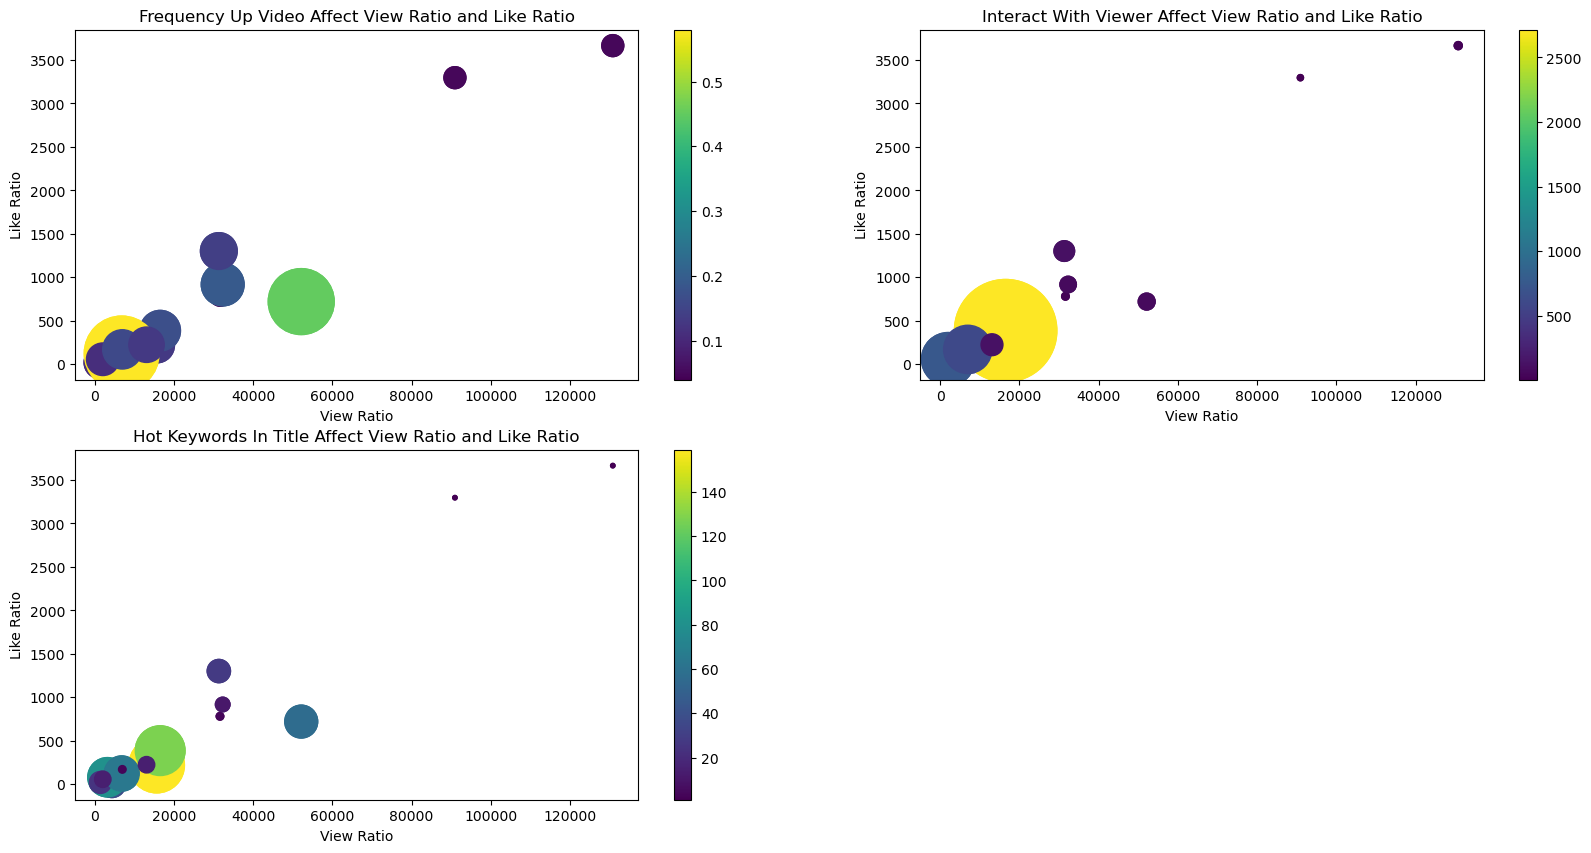

In [36]:

fig,ax=plt.subplots(2,2,figsize=(20,10))

list_factor=['Frequency','Interaction','keywords_count']
title_factor=['Frequency Up Video','Interact With Viewer','Hot Keywords In Title']
suitable_size=[5000,2,10]
for i in range(2):
    for j in range(2):
        if i*2+j==3:
            break
        ax[i,j].set_xlabel('View Ratio')
        ax[i,j].set_ylabel('Like Ratio')
        ax[i,j].set_title(title_factor[i*2+j]+' Affect View Ratio and Like Ratio')
        ax[i,j].scatter(df_analysis_factor_affect['view_ratio'], df_analysis_factor_affect['like_ratio'],
                        s=[val*suitable_size[i*2+j] for val in df_analysis_factor_affect[list_factor[i*2+j]]], 
                        c=df_analysis_factor_affect[list_factor[i*2+j]], cmap='viridis', alpha=1)
        plt.colorbar(ax[i,j].scatter(df_analysis_factor_affect['view_ratio'], df_analysis_factor_affect['like_ratio'],
                                      s=[val*suitable_size[i*2+j] for val in df_analysis_factor_affect[list_factor[i*2+j]]], 
                                      c=df_analysis_factor_affect[list_factor[i*2+j]], cmap='viridis', alpha=1), ax=ax[i,j])
        
fig.delaxes(ax[1, 1])
plt.show()

- With video posting frequency:
    - We can see that if we post videos with too much or too little frequency, we will not attract too many views and likes.
    - However, some channels post very few videos but are leading in the ability to attract viewers. This proves that quality is still an important factor when creating creative content rather than quantity.
- With the ability to interact with viewer.
    - Similar to the comments above, if there is too little interaction, it will not attract many followers, but some channels are at the top in terms of views even though the interactions are very low.
    - **Note**:However, this factor is only for reference, because the comment dataset only takes 50 comments for each video (youtube API quota limit), so the results may not be really accurate.
- With the frequency of using hot keywords in the video title:
    - Can be divided into 3 separate groups:
        - Group 1: (group that uses less and doesn't get many views/likes)
        - Group 2: (Group uses keywords at an average level): This group attracts a certain number of viewers but is not too prominent.
        - Group 3:(Use few keywords but attract many viewers): This may still be the video quality that brought results for them.